<a href="https://colab.research.google.com/github/yunjeong-chang/2021_MachineLearning/blob/main/7%EC%A3%BC%EC%B0%A8_Assignment2_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<이차판별분석 (QDA)>**

**: 당뇨병 예측** (당뇨병이면 1, 당뇨병이 아니면 0으로 라벨링하는 문제)

* **데이터셋 설명**
  - Pregnancies : 임신 횟수
  - Glucose : 글루코오스(탄수화물 화합물)
  - BloodPressure : 혈압
  - SkinThickness : 피부 두께
  - Insulin : 인슐린 수치
  - BMI : BMI 지수
  - DiabetesPedigreeFunction : 가족력
  - Age : 나이
  - Diabetes : 당뇨병이면 1, 당뇨병이아니면 0


* **데이터파일 설명**
  - **data.csv** : 당뇨병 데이터 + 당뇨병 보유 여부(0 or 1)
  - **X_test.csv** : 당뇨병 보유 여부외에는 train 데이터와 동일
  - **submit.csv** : submission 파일의 예시 (평가는 ACC 스코어)

In [452]:
import pandas as pd
import numpy as np

In [453]:
train = pd.read_csv('/content/data.csv')
test_x = pd.read_csv('/content/X_test.csv')
submit = pd.read_csv('/content/submit.csv')

In [454]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,1,95,60,18,58,23.9,0.260,22,0
1,5,105,72,29,325,36.9,0.159,28,0
2,0,135,68,42,250,42.3,0.365,24,1
3,4,131,68,21,166,33.1,0.160,28,0
4,1,103,30,38,83,43.3,0.183,33,0
...,...,...,...,...,...,...,...,...,...
532,5,139,64,35,140,28.6,0.411,26,0
533,1,96,122,0,0,22.4,0.207,27,0
534,10,101,86,37,0,45.6,1.136,38,1
535,0,141,0,0,0,42.4,0.205,29,1


In [455]:
train_x = train.drop('Diabetes', axis=1)
train_y = train['Diabetes']

# 데이터 살펴보기

In [456]:
train_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,95,60,18,58,23.9,0.260,22
1,5,105,72,29,325,36.9,0.159,28
2,0,135,68,42,250,42.3,0.365,24
3,4,131,68,21,166,33.1,0.160,28
4,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
532,5,139,64,35,140,28.6,0.411,26
533,1,96,122,0,0,22.4,0.207,27
534,10,101,86,37,0,45.6,1.136,38
535,0,141,0,0,0,42.4,0.205,29


In [457]:
train_y

0      0
1      0
2      1
3      0
4      0
      ..
532    0
533    0
534    1
535    1
536    0
Name: Diabetes, Length: 537, dtype: int64

In [458]:
test_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,98,58,33,190,34.0,0.430,43
1,2,112,75,32,0,35.7,0.148,21
2,2,108,64,0,0,30.8,0.158,21
3,8,107,80,0,0,24.6,0.856,34
4,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
226,0,119,0,0,0,32.4,0.141,24
227,4,109,64,44,99,34.8,0.905,26
228,0,127,80,37,210,36.3,0.804,23
229,6,105,70,32,68,30.8,0.122,37


In [459]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(537, 8)
(537,)
(231, 8)


In [460]:
train.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.726257,120.849162,69.685289,20.432030,79.836127,31.975605,0.469920,33.074488,0.350093
std,3.262965,32.339523,18.094374,15.490715,115.196730,7.624495,0.342087,11.685319,0.477444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.800000,0.241000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,129.000000,36.500000,0.612000,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


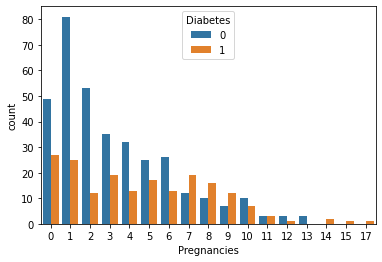

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=train, x = "Pregnancies", hue = "Diabetes")
#plt.xlim([0, 100])
#plt.ylim([0, 5])
#plt.show()

# 데이터 전처리

In [462]:
#임신 횟수 구간 레이블링
train_x['Pregnancies_1'] = 0
train_x.loc[train_x['Pregnancies']<=6, 'Pregnancies_1'] = 0
train_x.loc[train_x['Pregnancies']>6, 'Pregnancies_1'] = 1
train_x = train_x.drop('Pregnancies', axis=1)

test_x['Pregnancies_1'] = 0
test_x.loc[test_x['Pregnancies']<=6, 'Pregnancies_1'] = 0
test_x.loc[test_x['Pregnancies']>6, 'Pregnancies_1'] = 1
test_x = test_x.drop('Pregnancies', axis=1)

In [463]:
train_x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_1
0,95,60,18,58,23.9,0.260,22,0
1,105,72,29,325,36.9,0.159,28,0
2,135,68,42,250,42.3,0.365,24,0
3,131,68,21,166,33.1,0.160,28,0
4,103,30,38,83,43.3,0.183,33,0
...,...,...,...,...,...,...,...,...
532,139,64,35,140,28.6,0.411,26,0
533,96,122,0,0,22.4,0.207,27,0
534,101,86,37,0,45.6,1.136,38,1
535,141,0,0,0,42.4,0.205,29,0


In [464]:
#표준화
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(train_x)
train_x_std = scale.transform(train_x)
test_x_std = scale.transform(test_x)

# 모델

In [465]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#cld = LinearDiscriminantAnalysis(store_covariance=True)      
cqd = QuadraticDiscriminantAnalysis(store_covariance=True)

#cld.fit(train_x_std, train_y)
cqd.fit(train_x_std, train_y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

# 예측

In [466]:
#test_y_pred = cld.predict(test_x_std)
test_y_pred = cqd.predict(test_x_std)
test_y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

# 저장

In [467]:
for i in range(len(test_y_pred)) :
  submit['Diabetes'][i] = test_y_pred[i]

submit

,ID,Diabetes
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
226,226,1
227,227,0
228,228,0
229,229,0


In [468]:
submit.to_csv('당뇨병_18012576.csv', index=False)